# Employee Performance Prediction  
## INX Future Inc.

*RITESH KAUSHIK*  
Email: ritesh18043@gmail.com

---

## Project Summary  

INX Future Inc. has observed declining employee performance, raising concerns among management. The CEO initiated a project to analyze employee data, identify the causes of performance issues, and develop solutions.

### Objectives:  
- Analyze department-wise performance.  
- Identify the top 3 factors affecting employee performance.  
- Develop a machine learning model to predict performance.  
- Recommend strategies for improvement.  

---

### Analysis  
- The dataset is **supervised**, with **ordinal and categorical variables**.  
- Key features include Department, Job Role, Environment Satisfaction, Last Salary Hike, Work-Life Balance, Experience, and Years with Current Manager.  
- **Correlation Coefficients**, **Label Encoding**, and **Standardization** were applied to prepare the data.  
- Various algorithms like Logistic Regression, SVM, Decision Tree, Random Forest, Naive Bayes, KNN, XGBoost, and ANN were used for model training.  

---

### Steps Followed  
1. Import and explore the dataset.  
2. Perform department-wise analysis.  
3. Encode categorical columns.  
4. Calculate correlations and select key features.  
5. Standardize data and split into train/test sets.  
6. Train models, compare accuracy, and select the best.  
7. Export the best model for future use.

---

### Results  
- **Random Forest with GridSearchCV** gave the highest accuracy of **93%**.  
- **Top 3 Features Affecting Performance**:
  1. **Environment Satisfaction** (39.5%)  
  2. **Last Salary Hike Percent** (33.3%)  
  3. **Years Since Last Promotion** (16.7%)  

---

### Insights and Recommendations  
- **Insights**:  
  - Improving environment satisfaction, salary hikes, and work-life balance boosts performance.  
  - Long tenure with the same manager negatively affects performance.

- **Recommendations**:  
  - Enhance work environment and salary growth.  
  - Support work-life balance and consider role adjustments.

---
ob rotations and managerial shuffling to maintain engagement and growth.  

---


In [54]:
# Importing the necessary libraries

# For data manipulation and analysis
import pandas as pd  

# For data visualization
import seaborn as sns  
import matplotlib.pyplot as plt  

# For data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler  

# For splitting data and hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV  

# For evaluating the model's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  


In [10]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data

### Importing Raw data 

In [11]:
data = pd.read_excel(r"C:\Users\rites\Downloads\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")


## Source Code

### Exploratory Data Analysis

In [12]:
data.shape

(1200, 28)

In [13]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [14]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [15]:
# Looking for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

# Analysis of Department-wise Performance

This analysis helps in understanding the performance trends across different departments. By evaluating department-wise performance, we can identify specific areas that need improvement and tailor strategies to boost overall employee performance within each department.


In [16]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = data.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [17]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

<Axes: xlabel='EmpDepartment', ylabel='PerformanceRating'>

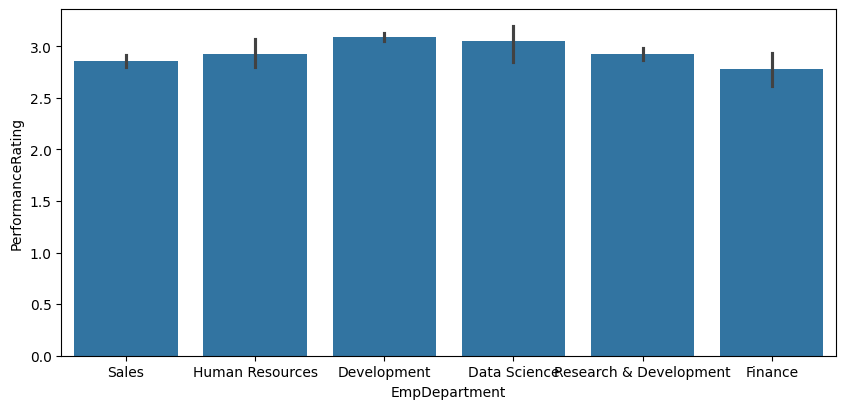

In [55]:
plt.figure(figsize=(10, 4.5))
sns.barplot(x=dept_per['EmpDepartment'], y=dept_per['PerformanceRating'])


In [56]:
# Analyze each department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [57]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

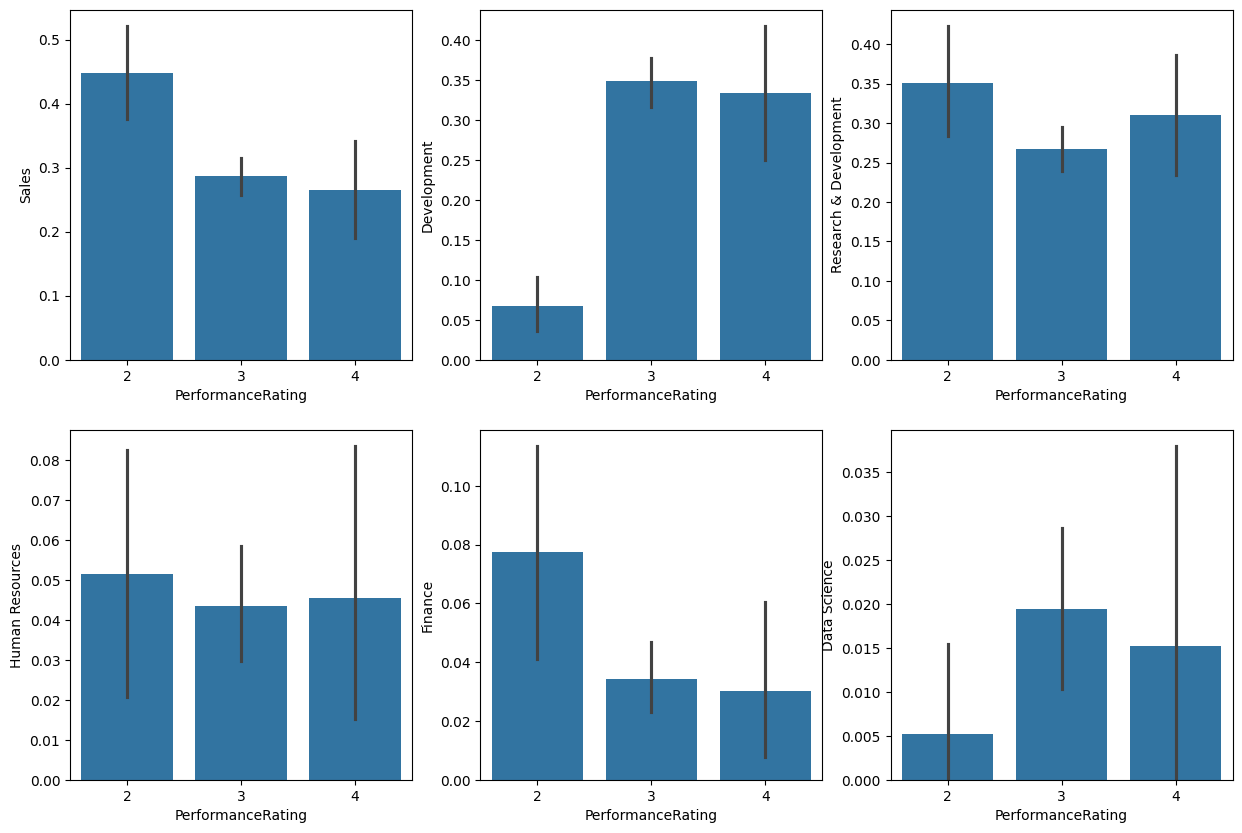

In [58]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Sales'])

plt.subplot(2, 3, 2)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Development'])

plt.subplot(2, 3, 3)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Research & Development'])

plt.subplot(2, 3, 4)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Human Resources'])

plt.subplot(2, 3, 5)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Finance'])

plt.subplot(2, 3, 6)
sns.barplot(x=dept_rating['PerformanceRating'], y=dept_rating['Data Science'])

plt.show()


### Data Processing/ Data Munging

In [59]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


# Feature Selection

The predictor variables contain many columns, so the correlation coefficient was used to identify the most important features for training. Features with a correlation greater than 0.1 with the Performance Rating were selected, including Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work-Life Balance, Experience Years at this Company, Experience Years in Current Role, Years Since Last Promotion, and Years with Current Manager. 

Feature transformation techniques like Standardization and Label Encoding were applied.  
An analysis with all predictors or Principal Component Analysis (PCA) decreased the model's accuracy.

The top 3 factors affecting employee performance are:
1. Environment Satisfaction
2. Last Salary Hike Percent
3. Years Since Last Promotion


In [62]:
# Finding out the correlation coeffecient to find out which predictors are significant.
data.corr()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,...,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.044612,0.012267,-0.017719,-0.037103,1.000000,...,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561


In [61]:
# Dropping the first columns as it is of no use for analysis.
data.drop(['EmpNumber'],inplace=True,axis=1)

In [63]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


In [64]:
# Here we have selected only the important columns
y = data.PerformanceRating
#X = data.iloc[:,0:-1]  All predictors were selected it resulted in dropping of accuracy.
X = data.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()

,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,5,13,4,12,2,10,7,0,8
1,5,13,4,12,3,7,7,1,7
2,5,13,4,21,3,18,13,1,12
3,3,8,2,15,2,21,6,12,6
4,5,13,1,14,3,2,2,2,2


In [65]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [66]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
X_train.shape

(840, 9)

In [68]:
X_test.shape

(360, 9)

#### PCA was used, it resulted in decline of accuracy.
    from sklearn.decomposition import PCA
    pca=PCA(n_components=None)
    X_train=pca.fit_transform(X_train)
    X_test=pca.transform(X_test)
    pca.explained_variance_ratio_

# Model Evaluation

In this section, we applied various algorithms including Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbor, XGBoost Classifier, and Artificial Neural Network to calculate the accuracy. The Random Forest model with GridSearchCV achieved the highest accuracy of 93%.


## 1. Logistic Regression

In [69]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [70]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)

In [71]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.8333333333333334
              precision    recall  f1-score   support

           2       0.65      0.48      0.55        63
           3       0.86      0.94      0.90       264
           4       0.81      0.67      0.73        33

    accuracy                           0.83       360
   macro avg       0.78      0.69      0.73       360
weighted avg       0.82      0.83      0.82       360



In [72]:
confusion_matrix(y_test,y_predict_log)

array([[ 30,  30,   3],
       [ 14, 248,   2],
       [  2,   9,  22]], dtype=int64)

# Support Vector Machine (SVM)

Support Vector Machine is a powerful classification algorithm that works by finding the hyperplane that best separates different classes in the feature space. It tries to maximize the margin between the classes, improving the generalization ability of the model. SVM is effective in high-dimensional spaces and is commonly used for both classification and regression tasks.


In [73]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [74]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [75]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.8444444444444444
              precision    recall  f1-score   support

           2       0.74      0.78      0.76        63
           3       0.92      0.88      0.90       264
           4       0.54      0.67      0.59        33

    accuracy                           0.84       360
   macro avg       0.73      0.78      0.75       360
weighted avg       0.85      0.84      0.85       360



In [76]:
confusion_matrix(y_test,y_predict_svm)

array([[ 49,  13,   1],
       [ 13, 233,  18],
       [  4,   7,  22]], dtype=int64)

# Decision Tree with GridSearchCV

A Decision Tree is a supervised learning algorithm that splits the data into subsets based on the feature values, creating a tree-like structure. It is easy to interpret and can handle both numerical and categorical data. By using GridSearchCV, we perform hyperparameter tuning to find the best parameters for the Decision Tree, improving its performance and accuracy.


In [77]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [78]:
model_griddtree.best_params_

{'criterion': 'entropy', 'min_samples_split': 5}

In [79]:
# Predicting the model
y_predict_dtree = model_griddtree.predict(X_test)

In [80]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.9055555555555556
              precision    recall  f1-score   support

           2       0.85      0.83      0.84        63
           3       0.94      0.95      0.94       264
           4       0.75      0.73      0.74        33

    accuracy                           0.91       360
   macro avg       0.85      0.83      0.84       360
weighted avg       0.90      0.91      0.90       360



In [81]:
confusion_matrix(y_test,y_predict_dtree)

array([[ 52,  10,   1],
       [  7, 250,   7],
       [  2,   7,  24]], dtype=int64)

# Random Forest with GridSearchCV

Random Forest is an ensemble learning method that combines multiple decision trees to improve accuracy and prevent overfitting. It works by averaging the predictions of individual trees, resulting in a more robust model. By using GridSearchCV, we perform hyperparameter tuning to optimize the model, enhancing its performance and achieving the best possible accuracy.


In [82]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [83]:
model_gridrf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [84]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [85]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9305555555555556
              precision    recall  f1-score   support

           2       0.92      0.89      0.90        63
           3       0.94      0.97      0.96       264
           4       0.83      0.73      0.77        33

    accuracy                           0.93       360
   macro avg       0.90      0.86      0.88       360
weighted avg       0.93      0.93      0.93       360



In [86]:
confusion_matrix(y_test,y_predict_rf)

array([[ 56,   7,   0],
       [  4, 255,   5],
       [  1,   8,  24]], dtype=int64)

## 5. Naive Bayes Bernoulli

In [87]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

BernoulliNB()

In [88]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)

In [89]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))

0.7944444444444444
              precision    recall  f1-score   support

           2       0.75      0.48      0.58        63
           3       0.80      0.97      0.88       264
           4       0.00      0.00      0.00        33

    accuracy                           0.79       360
   macro avg       0.52      0.48      0.49       360
weighted avg       0.72      0.79      0.74       360



In [90]:
confusion_matrix(y_test,y_predict_nb)

array([[ 30,  33,   0],
       [  8, 256,   0],
       [  2,  31,   0]], dtype=int64)

## 6. K-Nearest Neighbor

In [91]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [92]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [93]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.8333333333333334
              precision    recall  f1-score   support

           2       0.74      0.59      0.65        63
           3       0.85      0.94      0.90       264
           4       0.78      0.42      0.55        33

    accuracy                           0.83       360
   macro avg       0.79      0.65      0.70       360
weighted avg       0.83      0.83      0.82       360



In [94]:
confusion_matrix(y_test,y_predict_knn)

array([[ 37,  25,   1],
       [ 12, 249,   3],
       [  1,  18,  14]], dtype=int64)

## 7. XGBoost Classifier

In [97]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = le.fit_transform(y_train)

# Now train the model with the re-encoded target variable
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train_encoded)

# If needed, you can reverse the encoding for predictions
y_pred_encoded = model_xgb.predict(X_test)

# Reverse the encoding for predictions to get the original class labels
y_pred = le.inverse_transform(y_pred_encoded)


In [98]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)

In [99]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00      63.0
           3       0.00      0.00      0.00     264.0
           4       0.00      0.00      0.00      33.0

    accuracy                           0.00     360.0
   macro avg       0.00      0.00      0.00     360.0
weighted avg       0.00      0.00      0.00     360.0



In [100]:
confusion_matrix(y_test,y_predict_xgb)

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [ 55,   8,   0,   0,   0],
       [  5, 251,   8,   0,   0],
       [  2,   6,  25,   0,   0]], dtype=int64)

## 8. Artificial Neural Network

In [101]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [102]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [103]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.8861111111111111
              precision    recall  f1-score   support

           2       0.81      0.76      0.79        63
           3       0.92      0.94      0.93       264
           4       0.74      0.70      0.72        33

    accuracy                           0.89       360
   macro avg       0.82      0.80      0.81       360
weighted avg       0.88      0.89      0.88       360



In [104]:
confusion_matrix(y_test,y_predict_mlp)

array([[ 48,  14,   1],
       [  9, 248,   7],
       [  2,   8,  23]], dtype=int64)

In [106]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [108]:
import joblib

# Exporting the trained model
joblib.dump(model_gridrf, 'INX_Future_Inc.ml')


['INX_Future_Inc.ml']